In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('train_data.csv')
df.head()

,TIMESTAMP,LAST_PRICE_HSI,TURNOVER_VOLUME_HSI,LAST_BID_PRICE_HSI,LAST_ASK_PRICE_HSI,LAST_BID_VOLUME_HSI,LAST_ASK_VOLUME_HSI,LAST_PRICE_HHI,TURNOVER_VOLUME_HHI,LAST_BID_PRICE_HHI,LAST_ASK_PRICE_HHI,LAST_BID_VOLUME_HHI,LAST_ASK_VOLUME_HHI,MIDPOINT_HHI,MIDPOINT_HSI,LOG_RETURNS_HHI,LOG_RETURNS_HSI,predicted_HSI,LOG_RETURNS_HHI_scaled,predicted_RLM
0,2021-01-04 09:17:00+08:00,27145.0,452.0,27145.0,27147.0,3.0,2.0,10661.0,340.0,10660.0,10662.0,3.0,3.0,10661.0,27146.0,0.000094,0.000184,0.000078,0.162590,0.000079
1,2021-01-04 09:18:00+08:00,27140.0,370.0,27140.0,27143.0,2.0,2.0,10659.0,214.0,10658.0,10660.0,6.0,3.0,10659.0,27141.5,-0.000188,-0.000166,-0.000156,-0.320621,-0.000157
2,2021-01-04 09:19:00+08:00,27133.0,293.0,27132.0,27135.0,3.0,4.0,10654.0,209.0,10654.0,10655.0,1.0,2.0,10654.5,27133.5,-0.000422,-0.000295,-0.000352,-0.723525,-0.000353
3,2021-01-04 09:20:00+08:00,27127.0,475.0,27126.0,27128.0,1.0,3.0,10660.0,251.0,10658.0,10660.0,12.0,2.0,10659.0,27127.0,0.000422,-0.000240,0.000352,0.726574,0.000354
4,2021-01-04 09:21:00+08:00,27132.0,313.0,27127.0,27130.0,2.0,2.0,10661.0,272.0,10660.0,10662.0,5.0,6.0,10661.0,27128.5,0.000188,0.000055,0.000157,0.323670,0.000157


In [3]:
df.columns

Index(['TIMESTAMP', 'LAST_PRICE_HSI', 'TURNOVER_VOLUME_HSI',
       'LAST_BID_PRICE_HSI', 'LAST_ASK_PRICE_HSI', 'LAST_BID_VOLUME_HSI',
       'LAST_ASK_VOLUME_HSI', 'LAST_PRICE_HHI', 'TURNOVER_VOLUME_HHI',
       'LAST_BID_PRICE_HHI', 'LAST_ASK_PRICE_HHI', 'LAST_BID_VOLUME_HHI',
       'LAST_ASK_VOLUME_HHI', 'MIDPOINT_HHI', 'MIDPOINT_HSI',
       'LOG_RETURNS_HHI', 'LOG_RETURNS_HSI', 'predicted_HSI',
       'LOG_RETURNS_HHI_scaled', 'predicted_RLM'],
      dtype='object')

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Load Dataset
# Assuming 'data.csv' is the file
df = pd.read_csv('data.csv')

# Ensure TIMESTAMP is a datetime object and set as index
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df.set_index('TIMESTAMP', inplace=True)

# Step 2: Calculate Log Returns if not already present
if 'LOG_RETURNS_HHI' not in df.columns:
    df['LOG_RETURNS_HHI'] = np.log(df['LAST_PRICE_HHI'] / df['LAST_PRICE_HHI'].shift(1))

if 'LOG_RETURNS_HSI' not in df.columns:
    df['LOG_RETURNS_HSI'] = np.log(df['LAST_PRICE_HSI'] / df['LAST_PRICE_HSI'].shift(1))

# Drop NaN values caused by the log return calculation
df.dropna(inplace=True)

# Step 3: Scale LOG_RETURNS_HHI
scaler = StandardScaler()
df['LOG_RETURNS_HHI_scaled'] = scaler.fit_transform(df[['LOG_RETURNS_HHI']])

# Step 4: Train Linear Regression Model
# Predictor: LOG_RETURNS_HHI_scaled
# Target: LOG_RETURNS_HSI
X = df[['LOG_RETURNS_HHI_scaled']]
y = df['LOG_RETURNS_HSI']

# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)

# Step 5: Add Predictions as a new column
df['predicted_HSI'] = model.predict(X)

# Display the first few rows for verification
print(df.head())


                           LAST_PRICE_HSI  TURNOVER_VOLUME_HSI  \
TIMESTAMP                                                        
2021-01-04 09:17:00+08:00         27145.0                452.0   
2021-01-04 09:18:00+08:00         27140.0                370.0   
2021-01-04 09:19:00+08:00         27133.0                293.0   
2021-01-04 09:20:00+08:00         27127.0                475.0   
2021-01-04 09:21:00+08:00         27132.0                313.0   

                           LAST_BID_PRICE_HSI  LAST_ASK_PRICE_HSI  \
TIMESTAMP                                                           
2021-01-04 09:17:00+08:00             27145.0             27147.0   
2021-01-04 09:18:00+08:00             27140.0             27143.0   
2021-01-04 09:19:00+08:00             27132.0             27135.0   
2021-01-04 09:20:00+08:00             27126.0             27128.0   
2021-01-04 09:21:00+08:00             27127.0             27130.0   

                           LAST_BID_VOLUME_HSI  LAST_

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load Dataset
df = pd.read_csv('data.csv')
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df.set_index('TIMESTAMP', inplace=True)

# Calculate Log Returns if not already present
df['LOG_RETURNS_HHI'] = np.log(df['LAST_PRICE_HHI'] / df['LAST_PRICE_HHI'].shift(1))
df['LOG_RETURNS_HSI'] = np.log(df['LAST_PRICE_HSI'] / df['LAST_PRICE_HSI'].shift(1))
df.dropna(inplace=True)

# Scale LOG_RETURNS_HHI
scaler = StandardScaler()
df['LOG_RETURNS_HHI_scaled'] = scaler.fit_transform(df[['LOG_RETURNS_HHI']])

# Train Linear Regression Model
X = df[['LOG_RETURNS_HHI_scaled']]
y = df['LOG_RETURNS_HSI']
model = LinearRegression()
model.fit(X, y)
df['predicted_HSI'] = model.predict(X)

Results Summary:
final_portfolio_value: 100000.0
total_pnl: 0.0
max_drawdown: 0
sharpe_ratio: -1.0879661987708986
total_transaction_costs: 0
cash_deltas: List of 682723 values


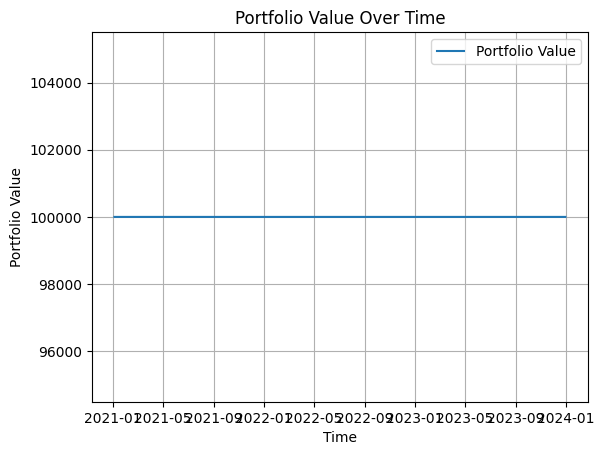

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load Dataset
df = pd.read_csv('data.csv')
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df.set_index('TIMESTAMP', inplace=True)

# Calculate Log Returns if not already present
df['LOG_RETURNS_HHI'] = np.log(df['LAST_PRICE_HHI'] / df['LAST_PRICE_HHI'].shift(1))
df['LOG_RETURNS_HSI'] = np.log(df['LAST_PRICE_HSI'] / df['LAST_PRICE_HSI'].shift(1))
df.dropna(inplace=True)

# Scale LOG_RETURNS_HHI
scaler = StandardScaler()
df['LOG_RETURNS_HHI_scaled'] = scaler.fit_transform(df[['LOG_RETURNS_HHI']])

# Train Linear Regression Model
X = df[['LOG_RETURNS_HHI_scaled']]
y = df['LOG_RETURNS_HSI']
model = LinearRegression()
model.fit(X, y)
df['predicted_HSI'] = model.predict(X)

# Generate Trading Signals
def generate_signals(row, buy_threshold=5, sell_threshold=5):
    if row['LAST_PRICE_HSI'] < row['predicted_HSI'] - buy_threshold:
        return 1  # Buy
    elif row['LAST_PRICE_HSI'] > row['predicted_HSI'] + sell_threshold:
        return -1  # Sell
    else:
        return 0  # Hold

df['signal'] = df.apply(generate_signals, axis=1)

# Portfolio Initialization
initial_cash = 100000  # Starting cash in USD
cash = initial_cash
hsi_position = 0
portfolio_value = []
transaction_costs = 0.1
cash_deltas = []
portfolio_peak = initial_cash
max_drawdown = 0

# Transaction Costs
transaction_cost_rate = 0.001  # 0.1% per trade

# Simulate Trading
for idx, row in df.iterrows():
    price = row['LAST_PRICE_HSI']
    signal = row['signal']
    available_liquidity = min(row['LAST_BID_VOLUME_HSI'], row['LAST_ASK_VOLUME_HSI'])

    # Skip if no liquidity
    if available_liquidity <= 0:
        portfolio_value.append(cash + hsi_position * price)
        continue

    # Adjust trade volume to use 10% of cash
    max_affordable_volume = (cash * 0.1) // price  # 10% of cash
    trade_volume = min(max_affordable_volume, available_liquidity)

    trade_cash_delta = 0  # Track cash delta for this trade

    if trade_volume > 0:
        transaction_cost = trade_volume * price * transaction_cost_rate
        trade_value = trade_volume * price + transaction_cost

        if signal == 1 and cash >= trade_value:  # Buy
            hsi_position += trade_volume
            cash -= trade_value
            trade_cash_delta = -trade_value
        elif signal == -1 and hsi_position >= trade_volume:  # Sell
            hsi_position -= trade_volume
            cash += trade_volume * price - transaction_cost
            trade_cash_delta = trade_volume * price - transaction_cost

        # Accumulate transaction costs
        transaction_costs += transaction_cost

    # Update Portfolio Value
    holdings_value = hsi_position * price
    current_portfolio_value = cash + holdings_value
    portfolio_value.append(current_portfolio_value)

    # Track Cash Delta
    cash_deltas.append(trade_cash_delta)

    # Check Drawdown
    portfolio_peak = max(portfolio_peak, current_portfolio_value)
    drawdown = (portfolio_peak - current_portfolio_value) / portfolio_peak
    max_drawdown = max(max_drawdown, drawdown)

# Add Portfolio Value to DataFrame
df['portfolio_value'] = portfolio_value

# Performance Metrics
final_portfolio_value = portfolio_value[-1]
pnl = final_portfolio_value - initial_cash
sharpe_ratio = (np.mean(df['LOG_RETURNS_HSI']) / np.std(df['LOG_RETURNS_HSI'])) * np.sqrt(len(df))

# Results Dictionary
results = {
    'final_portfolio_value': final_portfolio_value,
    'total_pnl': pnl,
    'max_drawdown': max_drawdown,
    'sharpe_ratio': sharpe_ratio,
    'total_transaction_costs': transaction_costs,
    'cash_deltas': cash_deltas,  # All cash delta changes
}

# Print Results
print("Results Summary:")
for key, value in results.items():
    if isinstance(value, list):
        print(f"{key}: List of {len(value)} values")
    else:
        print(f"{key}: {value}")

# Plot Portfolio Value
import matplotlib.pyplot as plt
plt.plot(df.index, df['portfolio_value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid()
plt.show()


In [8]:

# Portfolio Initialization
initial_cash = 100000  # Starting cash in USD
cash = initial_cash
hsi_position = 0
portfolio_value = []

# Transaction Costs
transaction_cost_rate = 0.001  # 0.1% per trade

# Max Drawdown Constraint
max_drawdown_limit = 0.1  # 10% drawdown
portfolio_peak = initial_cash

Final Portfolio Value: $100000.00
PnL: $0.00
Sharpe Ratio: -1.09


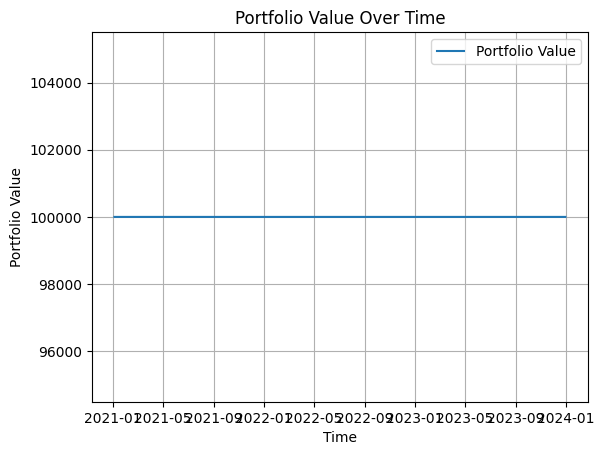

In [9]:
# Simulate Trading
for idx, row in df.iterrows():
    price = row['LAST_PRICE_HSI']
    signal = row['signal']
    available_liquidity = min(row['LAST_BID_VOLUME_HSI'], row['LAST_ASK_VOLUME_HSI'])

    # Trade Volume: Ensure it fits within available cash, transaction costs, and liquidity
    if signal != 0:
        max_affordable_volume = cash // price  # Maximum shares we can buy
        trade_volume = min(max_affordable_volume, available_liquidity)
        
        if trade_volume > 0:
            transaction_cost = trade_volume * price * transaction_cost_rate
            trade_value = trade_volume * price + transaction_cost

            if signal == 1 and cash >= trade_value:  # Buy
                hsi_position += trade_volume
                cash -= trade_value
            elif signal == -1 and hsi_position >= trade_volume:  # Sell
                hsi_position -= trade_volume
                cash += trade_value - transaction_cost

    # Update Portfolio Value
    holdings_value = hsi_position * price
    current_portfolio_value = cash + holdings_value
    portfolio_value.append(current_portfolio_value)

    # Check Drawdown
    portfolio_peak = max(portfolio_peak, current_portfolio_value)
    drawdown = (portfolio_peak - current_portfolio_value) / portfolio_peak
    if drawdown > max_drawdown_limit:
        print(f"Max drawdown limit exceeded on {idx}. Stopping trading.")
        break

# Add Portfolio Value to DataFrame
df['portfolio_value'] = portfolio_value

# Performance Metrics
final_portfolio_value = portfolio_value[-1]
pnl = final_portfolio_value - initial_cash
sharpe_ratio = (np.mean(df['LOG_RETURNS_HSI']) / np.std(df['LOG_RETURNS_HSI'])) * np.sqrt(len(df))

# Print Results
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"PnL: ${pnl:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Plot Portfolio Value
import matplotlib.pyplot as plt
plt.plot(df.index, df['portfolio_value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid()
plt.show()
